In [24]:
%reset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio
import glob
import os
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [2]:
def load_images(test_root, gt_root):
    test_images = []
    gt_images = []
    cnt_1 = 0
    cnt_2 = 0
    for image_name in glob.glob(f'{test_root}/*.jpg'):
        test_image = mpimg.imread(image_name)
        if test_image.shape[0] == 321 and cnt_1 != 50:
            cnt_1 += 1
            _, t = os.path.split(image_name)
            filename = os.path.splitext(t)[0]
            
            gt_img = sio.loadmat(f'{gt_root}{filename}')
            gt = np.empty((0,321,481))
            for i in range(5):
                gt = np.concatenate((gt, gt_img['groundTruth'][0][i][0][0][0].reshape((1,321,481))))
            
            test_images.append(mpimg.imread(image_name))
            gt_images.append(gt)
        else:
            cnt_2 += 1
    return np.asarray(test_images), np.asarray(gt_images)

In [4]:
def display_image_and_gt(images, gt, idx):
    f, axes = plt.subplots(2,3,figsize=(20,10))
    r,c=2,3
    
    
    for i in range(2):
        for j in range(3):
            if (i,j) == (0,0):
                axes[0,0].imshow(images[idx],aspect='auto')
                axes[0,0].axis('off')
                continue
            axes[i,j].imshow(gt[idx,r*i+j-1],aspect='auto')
            axes[i,j].axis('off')
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.show()

In [27]:
def rel_diff(x, y):
    return abs(x-y)/max(x,y)

def k_means(points, k=3, threshold=0.001, max_iters=100, dist_func='euclidean'):
    '''
        returns a numpy array with the centroid of each point at its index in the
        points array, and an array containing the centroids
    '''
    
    dist = {'euclidean':euclidean_distances, 'manhattan':manhattan_distances}[dist_func]
    # assume points are gaussian and pick k random points from the destribution as the centroids
    centroids = np.var(points, axis=0) * np.random.randn(k, points.shape[1],points.shape[2],points.shape[3])\
                                       + np.mean(points, axis=0)
    prev_loss = 1e9
    for i in range(max_iters):
        dists_to_centroids = dist(X=points, Y=centroids)
        assignment = np.argmin(dists_to_centroids, axis=1)
        loss = np.sum(np.linalg.norm(centroids[assignment] - points, axis=1)**2)
        if rel_diff(loss, prev_loss) <= threshold:
            break
        prev_loss = loss
        # update the centroids
        for cent_idx in range(k):
            cent_points = points[np.where(assignment==cent_idx)]
            if cent_points.shape[0] > 0: # to protect against when no points belong to the centroid
                centroids[cent_idx] = np.mean(cent_points, axis=0)
        
    return assignment, centroids, loss

def k_means_rep(points, k=3, threshold=0.001, max_iters=100, dist_func='euclidean', reps=1, ):
    min_loss = 1e9
    best_centroids, best_assignment = None, None
    for rep in range(reps):
        assignment, centroids, loss = k_means(points=points, k=k, threshold=threshold, max_iters=max_iters, dist_func=dist_func)
        if loss < min_loss:
            min_loss, best_centroids, best_assignment = loss, centroids, assignment
    return best_assignment, best_centroids, min_loss


In [3]:
root_test, root_gt = 'BSR_bsds500/BSR/BSDS500/data/images/test/', 'BSR_bsds500/BSR/BSDS500/data/groundTruth/test/'

test, ground_truth = load_images(root_test, root_gt)
ground_truth.shape

(50, 5, 321, 481)

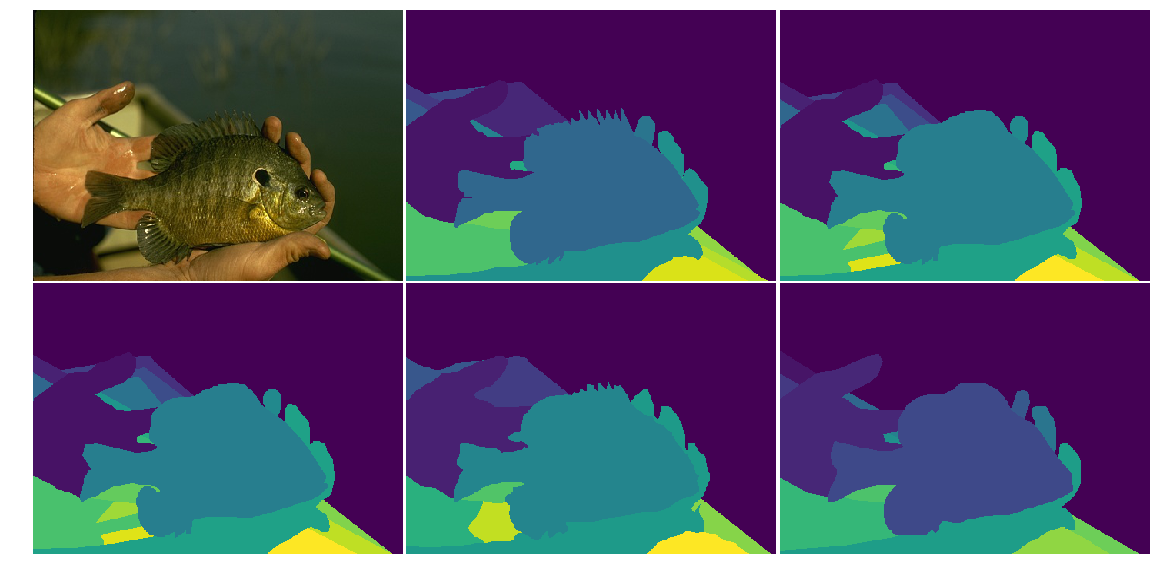

In [5]:
display_image_and_gt(test,ground_truth, 20)

(100,) (100,) (1, 100) (100, 1)


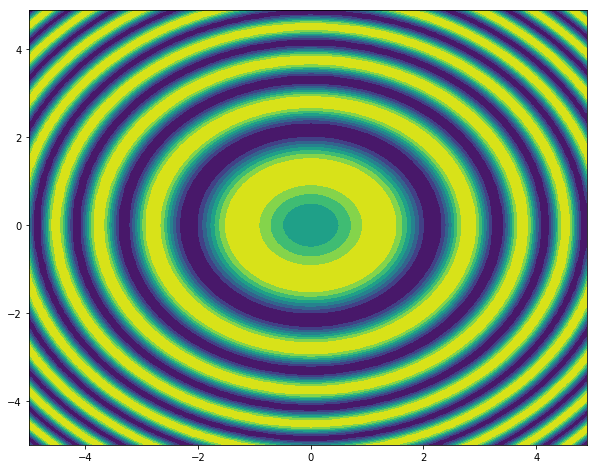

In [198]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) 
# / (xx**2 + yy**2)
print(x.shape, y.shape, xx.shape,yy.shape)
h = plt.contourf(x,y,z)
plt.show()

In [15]:
# from sklearn.cluster import KMeans
# xx = np.meshgrid(np.arange(321))
# yy = np.meshgrid(np.arange(481))
# kmeans = KMeans(n_clusters=10)
# print(test[0:3,:].shape)
# res = kmeans.fit(test[0:3,:])


(3, 321, 481, 3)


ValueError: Found array with dim 4. Estimator expected <= 2.

In [29]:
X = np.random.rand(1,3,50,20)

k_means(points=X, k=4)

ValueError: Found array with dim 4. check_pairwise_arrays expected <= 2.